In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
df = pd.read_csv("ANZ synthesised transaction dataset.csv")

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [5]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [6]:
df_cus = df.groupby("customer_id").mean()
df_cus.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
total = df.isnull().sum().sort_values(ascending = True)
total

status                   0
customer_id              0
country                  0
transaction_id           0
amount                   0
extraction               0
age                      0
gender                   0
movement                 0
balance                  0
date                     0
txn_description          0
long_lat                 0
currency                 0
account                  0
first_name               0
annual_salary            0
merchant_id           4326
merchant_suburb       4326
merchant_state        4326
card_present_flag     4326
merchant_long_lat     4326
bpay_biller_code     11158
merchant_code        11160
dtype: int64

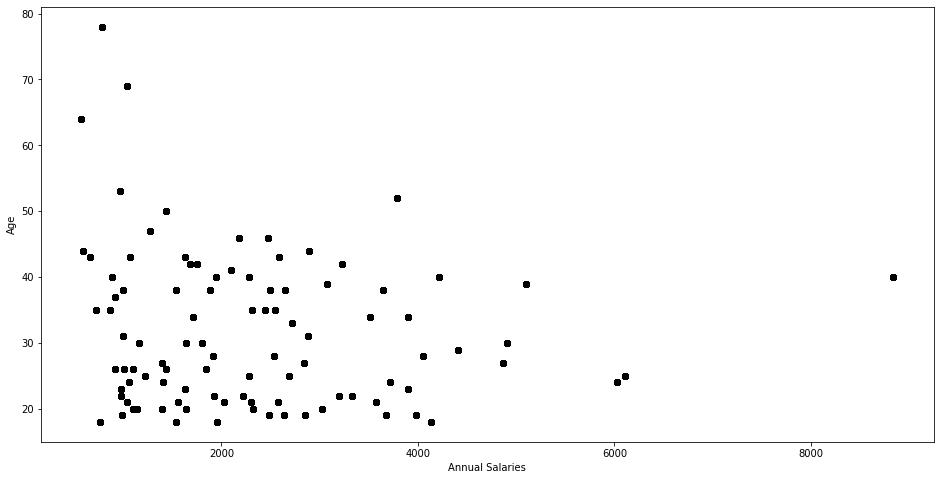

In [9]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df['annual_salary'],
    df['age'],
    c = 'black'
)
plt.xlabel("Annual Salaries")
plt.ylabel("Age")
plt.show()

In [10]:
X = df['annual_salary'].values.reshape(-1,1)
y = df['age'].values.reshape(-1,1)
regr = LinearRegression()  # create object of type linear regresion
regr = regr.fit(X, y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00059926]]
Intercept:  [31.95087568]


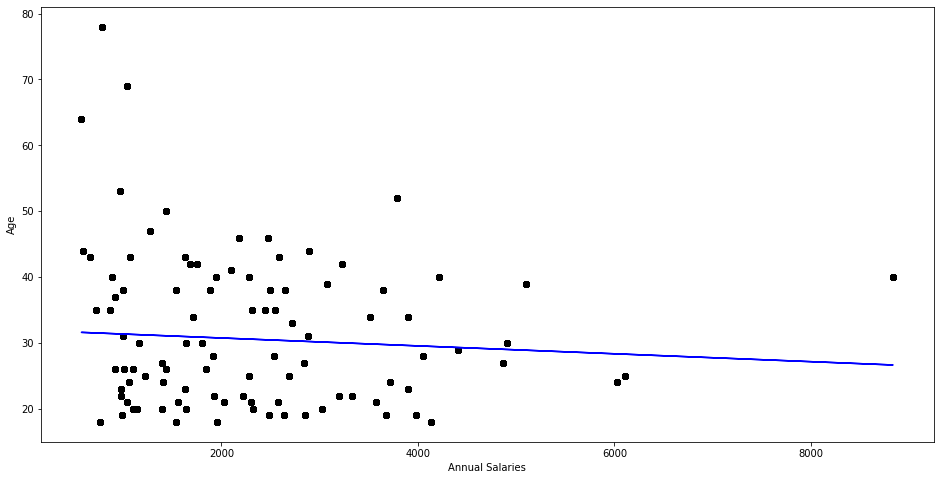

In [11]:
pred = regr.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter( df['annual_salary'], df['age'], color = 'black')  # this is actul data
plt.plot( df['annual_salary'], pred, color = 'blue')# plot that our algo has predicted 
plt.title('')
plt.xlabel("Annual Salaries")
plt.ylabel("Age")
plt.show()

# Linear Regression

In [12]:
N_train = int(len(df_cus)*0.8)
X_train = df_cus.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = df_cus["annual_salary"].iloc[:N_train]
X_test = df_cus.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = df_cus["annual_salary"].iloc[N_train:]

In [13]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#pridict the value of test set
y_pred = linear_reg.predict(X_test)
#print(Y_test,y_pred)
#print(Y_test-y_pred)

In [15]:
linear_reg.score(X_train, Y_train)

0.23295376366257825

In [16]:
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
print('RMSE = ',rmse)

RMSE =  1646.6814676201273


In [17]:
linear_reg.score(X_test, Y_test)

-0.3169423498074737

In [18]:
X = df['annual_salary']
y = df['age']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     85.20
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           3.14e-20
Time:                        19:24:23   Log-Likelihood:                -44831.
No. Observations:               12043   AIC:                         8.967e+04
Df Residuals:                   12041   BIC:                         8.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.9509      0.174    183.539

# Decision Tree - Classification and Regression

In [19]:
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [20]:
pd.get_dummies(df_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [21]:
N_train = int(len(df)*0.8)
X_train = pd.get_dummies(df_cat).iloc[:N_train]
Y_train = df["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(df_cat).iloc[N_train:]
Y_test = df["annual_salary"].iloc[N_train:]

In [22]:
decision_tree_class = DecisionTreeClassifier()

In [23]:
decision_tree_class.fit(X_train, Y_train)
decision_tree_class.score(X_train, Y_train)/0.01

78.82499481004774

In [24]:
decision_tree_class.predict(X_test)

array([1013, 1043, 4132, ..., 4054, 1043,  996])

In [25]:
decision_tree_class.score(X_test, Y_test)/0.01

75.5500207555002

# Regression

In [27]:
decision_tree_reg = DecisionTreeRegressor()

In [28]:
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)/0.01

74.68978726536879

In [31]:
decision_tree_reg.predict(X_test)

array([1226.42857143, 1043.        , 4132.        , ..., 3345.04761905,
       1043.        , 1626.        ])

In [33]:
decision_tree_reg.score(X_test, Y_test)/0.01

68.2280975856222